In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
from datetime import datetime, timedelta

df = pd.read_csv('data/orientation_test/Fast2_phone_03-05-2023 16-57-17.766.csv', header=None)
df.columns = ['timeStamp',
              'mAcc_0','mAcc_1','mAcc_2','mAcc_mag','t5', #mAcc is in m/s^2 according to android studio
              'mGyr_0','mGyr_1','mGyr_2'] #mGyr is in rad/s according to android studio

df['timeStamp'] = df['timeStamp'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f'))

# Calculate the total elapsed time in seconds
total_time = (df['timeStamp'].iloc[-1] - df['timeStamp'].iloc[0]).total_seconds()
print("Total elapsed time: {:.2f} seconds".format(total_time))

# Sampling frequency
fs = len(df)/total_time #should be 200 Hz?
print(f'Sample frequency = {fs}')

# Fixing time and time interval of interest
start_time = df['timeStamp'].iloc[0]
df['Time (s)'] = (df['timeStamp'] - start_time).dt.total_seconds()
print(df)

time = df['Time (s)']
time_interval = (time > 0) & (time < 100) #Default
#time_interval = (time > 25) & (time < 35) # Right turn 1
#time_interval = (time > 12.5) & (time < 27.5) # Left turn 1

#TODO: Find time interval where turn occurs -> look at angle
df = df[time_interval]
time = time[time_interval]

#TODO: how to approach stationary measurement? to remove offsets, since it's not really the same as DC offset removal (by using mean)

Total elapsed time: 6.02 seconds
Sample frequency = 721.8070088025245
                   timeStamp    mAcc_0    mAcc_1     mAcc_2   mAcc_mag  t5  \
0    1900-01-01 16:57:17.767  0.233300  0.256032   9.760623   9.766767  \t   
1    1900-01-01 16:57:17.768  0.233300  0.256032   9.760623   9.766767  \t   
2    1900-01-01 16:57:17.768  0.223729  0.253639   9.827921   9.833739  \t   
3    1900-01-01 16:57:17.769  0.223729  0.253639   9.827921   9.833739  \t   
4    1900-01-01 16:57:17.777  0.223729  0.253639   9.827921   9.833739  \t   
...                      ...       ...       ...        ...        ...  ..   
4341 1900-01-01 16:57:23.787  0.240479  0.228515   9.735498   9.741149  \t   
4342 1900-01-01 16:57:23.788  0.298206  0.218943  10.165309  10.172039  \t   
4343 1900-01-01 16:57:23.788  0.298206  0.218943  10.165309  10.172039  \t   
4344 1900-01-01 16:57:23.788  0.298206  0.218943  10.165309  10.172039  \t   
4345 1900-01-01 16:57:23.788  0.263211  0.167498  10.329217  10.333928  

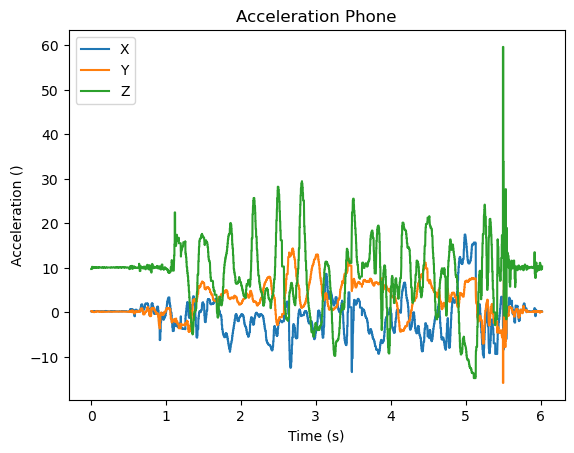

MEASURING SMARTPHONE DATA NOT WORKING :(...


In [11]:
# Remove DC offset
mAcc_x = df['mAcc_0']# - np.mean(df['mAcc_0'])
mAcc_y = df['mAcc_1']# - np.mean(df['mAcc_1'])
mAcc_z = df['mAcc_2']# - np.mean(df['mAcc_2'])
#TODO: Noise removal of acceleration so it clearer to visualise -> LPF
#TODO: also noise removal for gyroscope, road vibrations annoying?
#print(mAcc_x)

plt.plot(time, mAcc_x, label='X')
plt.plot(time, mAcc_y, label='Y')
plt.plot(time, mAcc_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration ()')
plt.title('Acceleration Phone')
plt.legend()
plt.show()

print('MEASURING SMARTPHONE DATA NOT WORKING :(...')
#TODO: Fix smartphone data -> maybe check android studio

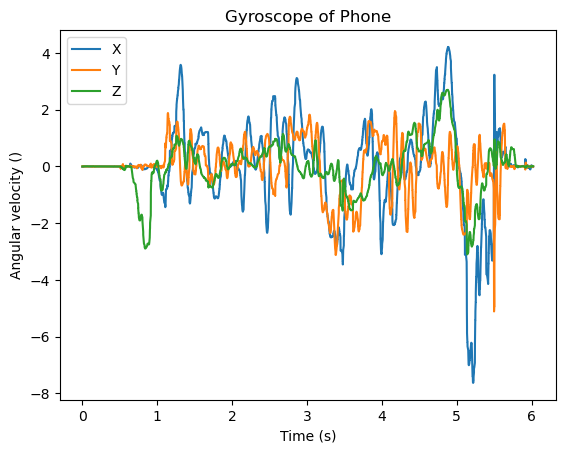

In [12]:
mGyr_x = df['mGyr_0']
mGyr_y = df['mGyr_1']
mGyr_z = df['mGyr_2']

plt.plot(time, mGyr_x, label='X')
plt.plot(time, mGyr_y, label='Y')
plt.plot(time, mGyr_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity ()')
plt.title('Gyroscope of Phone')
plt.legend()
plt.show()